In [1]:
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [154]:
df = pd.read_csv('PYTORCH_NOTEBOOKS/Data/NYCTaxiFares.csv')
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2010-04-19 08:17:56 UTC,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1
1,2010-04-17 15:43:53 UTC,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1
2,2010-04-17 11:23:26 UTC,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2
3,2010-04-11 21:25:03 UTC,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1
4,2010-04-17 02:19:01 UTC,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1


In [155]:
df['fare_amount'].describe()

count    120000.000000
mean         10.040326
std           7.500134
min           2.500000
25%           5.700000
50%           7.700000
75%          11.300000
max          49.900000
Name: fare_amount, dtype: float64

In [156]:
df.dtypes

pickup_datetime       object
fare_amount          float64
fare_class             int64
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

### Data Preprocessing and Feature extraction

In [4]:
### We can use the latitude and longitude to get the distance travelled. 
### We will use haversine formula to calculate the distance.

def haversine_distance(df, lat1, long1, lat2, long2):
    '''
        Calculate the distance between longitude and latitudes.
    '''
    r = 6371   # radius of the earth sphere
    
    phi1 = np.radians(df[lat1])
    phi2 = np.radians(df[lat2])
    
    delta_phi = np.radians(df[lat2]-df[lat1])
    delta_lambda = np.radians(df[long2]-df[long1])
     
    a = np.sin(delta_phi/2)**2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    d = (r * c) # in kilometers

    return d

In [5]:
df['dist_km'] = haversine_distance(df,'pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude')
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_km
0,2010-04-19 08:17:56 UTC,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2.126312
1,2010-04-17 15:43:53 UTC,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,1.392307
2,2010-04-17 11:23:26 UTC,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,3.326763
3,2010-04-11 21:25:03 UTC,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,1.864129
4,2010-04-17 02:19:01 UTC,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,7.231321


In [6]:
df['EDTdate'] = pd.to_datetime(df['pickup_datetime'].str[:19]) - pd.Timedelta(hours=4)
df['Hour'] = df['EDTdate'].dt.hour
df['AMorPM'] = np.where(df['Hour']<12,'am','pm')
df['Weekday'] = df['EDTdate'].dt.strftime("%a")
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_km,EDTdate,Hour,AMorPM,Weekday
0,2010-04-19 08:17:56 UTC,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2.126312,2010-04-19 04:17:56,4,am,Mon
1,2010-04-17 15:43:53 UTC,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,1.392307,2010-04-17 11:43:53,11,am,Sat
2,2010-04-17 11:23:26 UTC,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,3.326763,2010-04-17 07:23:26,7,am,Sat
3,2010-04-11 21:25:03 UTC,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,1.864129,2010-04-11 17:25:03,17,pm,Sun
4,2010-04-17 02:19:01 UTC,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,7.231321,2010-04-16 22:19:01,22,pm,Fri


In [7]:
### separate categorical column from continous columns

df.columns

Index(['pickup_datetime', 'fare_amount', 'fare_class', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'dist_km', 'EDTdate', 'Hour', 'AMorPM', 'Weekday'],
      dtype='object')

In [8]:
cats_col = ['Hour', 'AMorPM', 'Weekday']
conts_col = ['pickup_longitude','pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
             'passenger_count', 'dist_km']

y_col = ['fare_amount']

In [9]:
for c in cats_col:
    df[c] = df[c].astype('category')

In [10]:
df.dtypes

pickup_datetime              object
fare_amount                 float64
fare_class                    int64
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count               int64
dist_km                     float64
EDTdate              datetime64[ns]
Hour                       category
AMorPM                     category
Weekday                    category
dtype: object

In [95]:
hr = df['Hour'].cat.codes.values
ampm = df['AMorPM'].cat.codes.values
weekday = df['Weekday'].cat.codes.values

cats = np.stack([hr,ampm,weekday],1) ## stack or combine all the categorical columns into a single array

cats

array([[ 4,  0,  1],
       [11,  0,  2],
       [ 7,  0,  2],
       ...,
       [14,  1,  3],
       [ 4,  0,  5],
       [12,  1,  2]], dtype=int8)

In [96]:
### stack up continous values

conts = np.stack([ df[c].values for c in conts_col ],1)
conts

array([[-73.992365  ,  40.730521  , -73.975499  ,  40.744746  ,
          1.        ,   2.12631159],
       [-73.990078  ,  40.740558  , -73.974232  ,  40.744114  ,
          1.        ,   1.39230687],
       [-73.994149  ,  40.751118  , -73.960064  ,  40.766235  ,
          2.        ,   3.32676344],
       ...,
       [-73.988574  ,  40.749772  , -74.011541  ,  40.707799  ,
          3.        ,   5.05252282],
       [-74.004449  ,  40.724529  , -73.992697  ,  40.730765  ,
          1.        ,   1.20892296],
       [-73.955415  ,  40.77192   , -73.967623  ,  40.763015  ,
          3.        ,   1.42739869]])

In [113]:
### convert the np arrays to tensors

cats = torch.tensor(cats, dtype=torch.int64)
conts = torch.tensor(conts, dtype=torch.float)

y = torch.FloatTensor(df[y_col].values).reshape(-1,1)

<ipython-input-113-babea65c6cdb>:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  cats = torch.tensor(cats, dtype=torch.int64)
<ipython-input-113-babea65c6cdb>:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  conts = torch.tensor(conts, dtype=torch.float)


In [114]:
cats

tensor([[ 4,  0,  1],
        [11,  0,  2],
        [ 7,  0,  2],
        ...,
        [14,  1,  3],
        [ 4,  0,  5],
        [12,  1,  2]])

In [115]:
y

tensor([[ 6.5000],
        [ 6.9000],
        [10.1000],
        ...,
        [12.5000],
        [ 4.9000],
        [ 5.3000]])

In [116]:
### final list of attributes

cats.shape

torch.Size([120000, 3])

In [117]:
conts.shape

torch.Size([120000, 6])

In [118]:
y.shape

torch.Size([120000, 1])

### Embedding

In [119]:
### understanding sample example of word embeddings

embeddings = nn.Embedding(num_embeddings=10, embedding_dim=3)

input = torch.LongTensor([[1,2,4,5],[4,3,2,9]]) ## the numbers need to be in sync.

In [120]:
embeddings

Embedding(10, 3)

In [121]:
input

tensor([[1, 2, 4, 5],
        [4, 3, 2, 9]])

In [122]:
embedded_input = embeddings(input)
embedded_input

tensor([[[ 0.4871,  0.7214, -0.9378],
         [ 2.7247,  1.5712, -1.5386],
         [ 1.6410,  0.7898, -0.3745],
         [ 0.6866, -0.1905, -1.0634]],

        [[ 1.6410,  0.7898, -0.3745],
         [ 0.4551, -0.8545,  0.4452],
         [ 2.7247,  1.5712, -1.5386],
         [-0.1692, -1.1532,  2.6514]]], grad_fn=<EmbeddingBackward>)

In [123]:
embedded_input.shape

torch.Size([2, 4, 3])

In [124]:
## define the embedding size for categorical columns

cat_size = [ len(df[c].cat.categories) for c in cats_col]
embs_size = [ (c, min(50, (c+1)//2)) for c in cat_size ]  ### rule of thumb. embedding_size not excedding more than 50

embs_size

[(24, 12), (2, 1), (7, 4)]

### Building the Model

In [140]:
class TabularModel(nn.Module):
    
    def __init__(self,embs_size, n_cont, out_size, layers, p=0.5):
        super().__init__()
        
        self.embeds = nn.ModuleList([nn.Embedding(ne,esize) for ne, esize in embs_size])
        self.dropout = nn.Dropout(p)
        self.batchnorm1d = nn.BatchNorm1d(n_cont) ## batch normalization for continous values
        
        layerlist = []
        
        n_embs = sum((nf for ni, nf in embs_size))
        n_input = n_embs + n_cont
        
        for i in layers:
            layerlist.append(nn.Linear(n_input,i))
            layerlist.append(nn.ReLU(inplace=True))
            layerlist.append(nn.BatchNorm1d(i))
            layerlist.append(nn.Dropout(p))
            
            n_input = i ## after the 1st iteration, the input becomes the output for the layer1
            
        layerlist.append(nn.Linear(layers[-1],out_size))
        
        self.layers = nn.Sequential(*layerlist) ## combine as a sequential layer
    
    
    def forward(self, x_cat, x_cont):
        embeddings = []
        for i,e in enumerate(self.embeds):
            embeddings.append(e(x_cat[:,i]))
        x = torch.cat(embeddings, 1)
        x = self.dropout(x)
        
        x_cont = self.batchnorm1d(x_cont)
        x = torch.cat([x, x_cont], 1)
        x = self.layers(x)
        return x

In [141]:
torch.manual_seed(43)

model = TabularModel(embs_size, conts.shape[1], 1, [200,100], 0.4)

model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(24, 12)
    (1): Embedding(2, 1)
    (2): Embedding(7, 4)
  )
  (dropout): Dropout(p=0.4, inplace=False)
  (batchnorm1d): BatchNorm1d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=23, out_features=200, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=200, out_features=100, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=100, out_features=1, bias=True)
  )
)

In [142]:
## testing some snips in the model

selfembds = nn.ModuleList([ nn.Embedding(num_embeddings=cat_size, embedding_dim=emb_size) for cat_size, emb_size in embs_size])

selfembds

ModuleList(
  (0): Embedding(24, 12)
  (1): Embedding(2, 1)
  (2): Embedding(7, 4)
)

In [143]:
## iterate over the module list

list(enumerate(selfembds))

[(0, Embedding(24, 12)), (1, Embedding(2, 1)), (2, Embedding(7, 4))]

In [144]:
## generate the embeddings based on the categorical inputs

catz = cats[:3]
print(catz)

embeddingz = []

for i,e in enumerate(selfembds):
    print(i,"\t",e,"\t",catz[:,i])
    embeddingz.append(e(catz[:,i]))
    
print(embeddingz)

tensor([[ 4,  0,  1],
        [11,  0,  2],
        [ 7,  0,  2]])
0 	 Embedding(24, 12) 	 tensor([ 4, 11,  7])
1 	 Embedding(2, 1) 	 tensor([0, 0, 0])
2 	 Embedding(7, 4) 	 tensor([1, 2, 2])
[tensor([[-0.2444,  1.1423, -0.9040, -1.2943, -0.4704, -1.0650, -0.3825,  0.8106,
          1.4967, -0.2787,  0.5608,  0.2403],
        [-2.4204, -0.5451,  1.2503, -0.3485, -1.4470,  0.7133, -0.9494, -0.4867,
          1.0317, -0.5628, -1.7098, -2.5643],
        [-0.9331, -0.2268, -0.0646, -0.1164, -1.9337,  0.6303, -1.0596, -1.4841,
         -0.9316,  0.2636, -1.7160,  2.0503]], grad_fn=<EmbeddingBackward>), tensor([[-1.0060],
        [-1.0060],
        [-1.0060]], grad_fn=<EmbeddingBackward>), tensor([[-0.1661,  0.5776, -1.5871,  0.6386],
        [ 0.9419, -0.3500,  0.7339,  0.5983],
        [ 0.9419, -0.3500,  0.7339,  0.5983]], grad_fn=<EmbeddingBackward>)]


### Loss and Optimizer

In [145]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

### Train/Test split

In [146]:
batch_size = 60000
test_size = int(batch_size * .2)

cat_train = cats[:batch_size-test_size]
cat_test = cats[batch_size-test_size:batch_size]
con_train = conts[:batch_size-test_size]
con_test = conts[batch_size-test_size:batch_size]
y_train = y[:batch_size-test_size]
y_test = y[batch_size-test_size:batch_size]

print(cat_train.shape, cat_test.shape)

torch.Size([48000, 3]) torch.Size([12000, 3])


### Train the model

In [147]:
import time
start_time = time.time()

epochs = 300
losses = []

for i in range(epochs):
    i+=1
    y_pred = model(cat_train, con_train)
    loss = torch.sqrt(criterion(y_pred, y_train)) # RMSE
    losses.append(loss)
    
    # a neat trick to save screen space:
    if i%25 == 1:
        print(f'epoch: {i:3}  loss: {loss.item():10.8f}')

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

print(f'epoch: {i:3}  loss: {loss.item():10.8f}') # print the last line
print(f'\nDuration: {time.time() - start_time:.0f} seconds') # print the time elapsed

epoch:   1  loss: 12.56651306
epoch:  26  loss: 6.69211197
epoch:  51  loss: 3.57880282
epoch:  76  loss: 3.38571978
epoch: 101  loss: 3.31039453
epoch: 126  loss: 3.26427698
epoch: 151  loss: 3.23729920
epoch: 176  loss: 3.21001863
epoch: 201  loss: 3.19651389
epoch: 226  loss: 3.17810297
epoch: 251  loss: 3.19509697
epoch: 276  loss: 3.17250896
epoch: 300  loss: 3.16930056

Duration: 425 seconds


Text(0.5, 0, 'epoch')

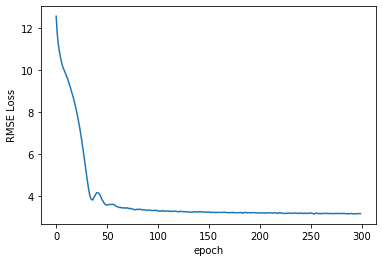

In [148]:
plt.plot(range(epochs), losses)
plt.ylabel('RMSE Loss')
plt.xlabel('epoch')

In [150]:
# TO EVALUATE THE ENTIRE TEST SET
with torch.no_grad():
    y_val = model(cat_test, con_test)
    loss = torch.sqrt(criterion(y_val, y_test))
print(f'RMSE: {loss:.8f}')

RMSE: 3.11752605


In [151]:
if len(losses) == epochs:
    torch.save(model.state_dict(), 'TaxiFareRegrModel.pt')
else:
    print('Model has not been trained. Consider loading a trained model instead.')